In [ ]:
import pandas as pd

data = pd.read_csv('bridge_data_task1.csv')

## Here i am checking the first 10 rows of my data

In [ ]:
data.head(10)

,ID,Split,Lesson_Topic,History,Expert_Human_Tutor,Peda_Strategies,Label
0,411460689,test,7.4D.Percent Change,||| teacher: Plus 3 points added to your score...,This is a common mistake. To find the percent ...,explain_concept,1
1,178346128,train,Not Available,teacher: Hi! ||| student: yo! what brought you...,Do you think Neural Link will allow you to liv...,NaN,0
2,9334671283,test,Not Available,teacher: Hi! ||| student: Have you seen any go...,Oh really? To be honest I think the actor is n...,NaN,0
3,1142264546,val,Not Available,teacher: Hi! ||| student: Hey! How are you fee...,"lol what's a klutz? yeah I like, but I'm not good",NaN,0
4,3690027652,train,Not Available,teacher: Hi! ||| student: How's it going? ||| ...,Maybe its a little too early to even be thinki...,NaN,0
5,4325222964,train,Not Available,"teacher: Hi! ||| student: Hello, how are you? ...",BRILLIANT. I love it.,NaN,0
6,632146313,train,5.5A.Graphing on a Coordinate Grid,||| student: chat window ||| teacher: Thanks f...,"Great try! When you plot the point (3, 2) you ...",explain_concept,1
7,2856167175,train,3.6B.Quadrilaterals,||| teacher: Please solve the problem. ||| stu...,"Hm, not quite. In order for a shape to be a qu...",explain_concept,1
8,9067554074,train,Not Available,teacher: Hi! ||| student: Hi! How was your wee...,yum yum yum no only good old oily frier,NaN,0
9,7147877021,train,Not Available,"teacher: Hi! ||| student: Hey, how's your day ...","okayish, it is flying by quicker than I expect...",NaN,0


## Now i will do DATA preprocessing

In [ ]:

data.isna().sum()

ID                      0
Split                   0
Lesson_Topic            0
History                 0
Expert_Human_Tutor      0
Peda_Strategies       700
Label                   0
dtype: int64

## here the only two columns that i want to use is the (expert human tutor) and the (label) so i will not use the rest and since i just want these two columns so i will drop the columns that i will not use

In [ ]:
data.drop(['Lesson_Topic', 'History', 'Peda_Strategies'], axis=1, inplace=True)

In [ ]:
data.head(5)

,ID,Split,Expert_Human_Tutor,Label
0,411460689,test,This is a common mistake. To find the percent ...,1
1,178346128,train,Do you think Neural Link will allow you to liv...,0
2,9334671283,test,Oh really? To be honest I think the actor is n...,0
3,1142264546,val,"lol what's a klutz? yeah I like, but I'm not good",0
4,3690027652,train,Maybe its a little too early to even be thinki...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  1400 non-null   int64 
 1   Split               1400 non-null   object
 2   Expert_Human_Tutor  1400 non-null   object
 3   Label               1400 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.9+ KB


## This DataFrame consists of 1400 rows and 4 columns. The columns include ID (an integer identifier), Split (categorizing the data into training, validation, or test sets), Expert_Human_Tutor (containing the tutor's responses), and Label (a binary integer indicating whether a pedagogical strategy is present). All columns contain complete data with no missing values, and the total memory usage of the DataFrame is approximately 43.9 KB.

In [ ]:
data['Split'].value_counts()

Split
train    838
test     420
val      142
Name: count, dtype: int64

## here i have checked how many train split i have which is 838 and how many test split i have and it is 420 and how many validation split i have which is 142 .

In [ ]:
data['Label'].value_counts()

Label
1    700
0    700
Name: count, dtype: int64

In [ ]:
train_data_checking = data[data['Split'] == 'train']
train_label_counts = train_data_checking['Label'].value_counts()
print(train_label_counts)


Label
0    419
1    419
Name: count, dtype: int64


In [ ]:
test_data_checking = data[data['Split'] == 'test']

train_label_counts = test_data_checking['Label'].value_counts()
print(train_label_counts)


Label
1    210
0    210
Name: count, dtype: int64


In [ ]:
val_data_checking = data[data['Split'] == 'val']

train_label_counts = val_data_checking['Label'].value_counts()
print(train_label_counts)


Label
0    71
1    71
Name: count, dtype: int64


### Checking the count of 0 and 1 in each data type:

1. **Overall Label Distribution**: I checked how many `0` and `1` labels are present in the entire dataset, finding 700 instances of each.

2. **Train Set Label Distribution**: I filtered the data to include only rows where the 'Split' column is 'train' and found that there are 419 `0` labels and 419 `1` labels in the training set.

3. **Test Set Label Distribution**: Similarly, I filtered the data to include only rows where the 'Split' column is 'test' and found that the test set contains 210 instances each of `0` and `1` labels.

4. **Validation Set Label Distribution**: Finally, I filtered the data for the validation set ('Split' = 'val') and found an equal distribution of 71 instances of both `0` and `1` labels.

This analysis helped to verify that the data is balanced across all splits for the binary classification task.


## Now i will check if there is some duplication in the data from the ID column:

In [ ]:
num_duplicates = data['ID'].duplicated().sum()

print(f'Number of duplicated IDs: {num_duplicates}')


Number of duplicated IDs: 522


## So i observe from that there is a duplication in the data set and it is 522 duplicated data, therefore now i will keep the first occurrence and remove it duplicate

In [ ]:
data_cleaned = data.drop_duplicates(subset='ID', keep='first')
print(f'Number of rows after removing duplicates: {len(data_cleaned)}')

Number of rows after removing duplicates: 878


## now the data become 878 after removing the duplicates. Therefore, now i will check again how many train and test and val is left.

In [ ]:
data_cleaned['Split'].value_counts()

Split
train    582
test     223
val       73
Name: count, dtype: int64

Label
0    303
1    279
Name: count, dtype: int64


<Axes: ylabel='count'>

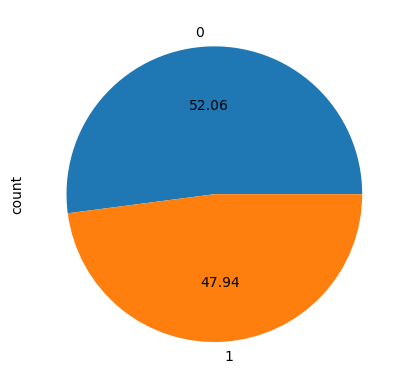

In [ ]:
train_data_checking_cleaned = data_cleaned[data_cleaned['Split'] == 'train']
train_label_counts_cleaned = train_data_checking_cleaned['Label'].value_counts()
print(train_label_counts_cleaned)
train_label_counts_cleaned.plot.pie(autopct= '%.2f')`Z`

Label
1    132
0     91
Name: count, dtype: int64


<Axes: ylabel='count'>

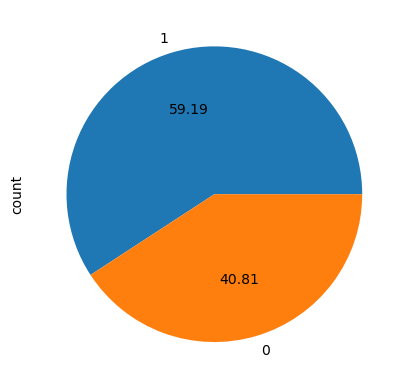

In [ ]:
test_data_checking_cleaned = data_cleaned[data_cleaned['Split'] == 'test']
test_label_counts_cleaned = test_data_checking_cleaned['Label'].value_counts()
print(test_label_counts_cleaned)
test_label_counts_cleaned.plot.pie(autopct= '%.2f')

Label
1    48
0    25
Name: count, dtype: int64


<Axes: ylabel='count'>

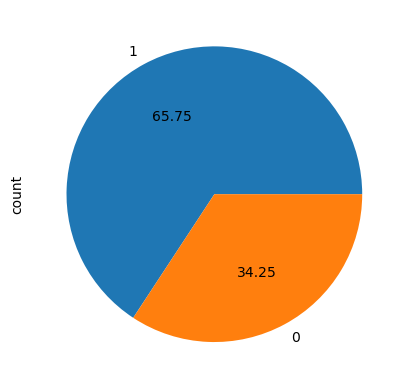

In [ ]:
val_data_checking_cleaned = data_cleaned[data_cleaned['Split'] == 'val']
val_label_counts_cleaned = val_data_checking_cleaned['Label'].value_counts()
print(val_label_counts_cleaned)
val_label_counts_cleaned.plot.pie(autopct= '%.2f')

## so i observe from that, after removing the duplicates the data become imbalanced which will cause many issuee. so to solve this issue we can use the Random undersampling which means reduce the number of the high class to become equal to the lower class or we can us e Random oversampling which means we increase the number of small class to become equal to the larger class. Therefore, I initially planned to use random oversampling or undersampling to address the class imbalance in my dataset. However, both methods have notable drawbacks: undersampling can lead to a loss of valuable data from the majority class, while oversampling can cause overfitting as it duplicates data points, leading to the model learning repeated patterns. To mitigate these issues, I have decided to use SMOTE (Synthetic Minority Over-sampling Technique) instead. SMOTE generates synthetic data points for the minority class, providing a balanced dataset without simply duplicating data, reducing the risk of overfitting and preserving the original data distribution.

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## i have Filtered the data to include only the rows with 'train', 'test', and 'val' splits and here i have kept the two columns which i need the Expert_Human_Tutor and Label and i dropped the rest

In [ ]:
train_data = data_cleaned[data_cleaned['Split'] == 'train'][['Expert_Human_Tutor', 'Label']]
test_data = data_cleaned[data_cleaned['Split'] == 'test'][['Expert_Human_Tutor', 'Label']]
val_data = data_cleaned[data_cleaned['Split'] == 'val'][['Expert_Human_Tutor', 'Label']]

In [ ]:
train_data.head()

,Expert_Human_Tutor,Label
1,Do you think Neural Link will allow you to liv...,0
4,Maybe its a little too early to even be thinki...,0
5,BRILLIANT. I love it.,0
6,"Great try! When you plot the point (3, 2) you ...",1
7,"Hm, not quite. In order for a shape to be a qu...",1


In [ ]:
test_data.head()

,Expert_Human_Tutor,Label
0,This is a common mistake. To find the percent ...,1
2,Oh really? To be honest I think the actor is n...,0
14,Sure hate it! Limits our ability to go out eve...,0
15,What would happen if you folded the shape alon...,1
23,Let's look at another example. If we compare 3...,1


In [ ]:
val_data.head()

,Expert_Human_Tutor,Label
3,"lol what's a klutz? yeah I like, but I'm not good",0
17,Why do you think it's division?,1
31,Oh I see. What do you do?,0
44,Great try! What was your first step?,1
50,"Yes, I went to a traditional tea house in Kyot...",0


In [ ]:
test_data.count()

Expert_Human_Tutor    223
Label                 223
dtype: int64

In [ ]:
train_data.count()

Expert_Human_Tutor    582
Label                 582
dtype: int64

In [ ]:
val_data.count()

Expert_Human_Tutor    73
Label                 73
dtype: int64

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/besherhasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/besherhasan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/besherhasan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Here i have created a function to do text preprocessing to apply to the texts {Lower casing , remove puctuation, remove stop words, Lemmatization Convert to base form }

In [ ]:
def preprocess_text(text):
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [ ]:
train_data['Expert_Human_Tutor'] = train_data['Expert_Human_Tutor'].apply(preprocess_text)
test_data['Expert_Human_Tutor'] = test_data['Expert_Human_Tutor'].apply(preprocess_text)
val_data['Expert_Human_Tutor'] = val_data['Expert_Human_Tutor'].apply(preprocess_text)

Before applying SMOTE to balance the dataset, it is essential to preprocess the text data to clean and standardize it. This involves steps like lowercasing, removing special characters, and eliminating unnecessary words, ensuring that the text is ready for analysis. We then apply TF-IDF, which converts the text into numerical features that represent the importance of terms within the dataset. This step is crucial because SMOTE requires numerical input to generate synthetic samples. Preprocessing and TF-IDF ensure that SMOTE operates on clean and meaningful features, helping improve the model’s performance on imbalanced data.

## Check Class Distribution Before SMOTE


In [ ]:
print('Before SMOTE (Train):')
print(train_data['Label'].value_counts())
print('Before SMOTE (Test):')
print(test_data['Label'].value_counts())
print('Before SMOTE (Validation):')
print(val_data['Label'].value_counts())

Before SMOTE (Train):
Label
0    303
1    279
Name: count, dtype: int64
Before SMOTE (Test):
Label
1    132
0     91
Name: count, dtype: int64
Before SMOTE (Validation):
Label
1    48
0    25
Name: count, dtype: int64


## Here i am applying Text Vectorization (TF-IDF)

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
X_train = tfidf.fit_transform(train_data['Expert_Human_Tutor'])
y_train = train_data['Label']
X_test = tfidf.transform(test_data['Expert_Human_Tutor'])
y_test = test_data['Label']
X_val = tfidf.transform(val_data['Expert_Human_Tutor'])
y_val = val_data['Label']

## Handling Imbalanced Data using SMOTE for Train only since The training data is where the model learns, so SMOTE is used here to handle imbalanced data and ensure the model doesn't become biased toward the majority class. Applying SMOTE here helps balance the class distribution and improve model learning.

## Validation and Test Sets: These sets are used to evaluate the model's performance, and they should represent real-world data. so we should not artificially balance these sets because we want to see how the model performs on imbalanced, real-world data

In [ ]:
import numpy as np

In [ ]:
smote = SMOTE(random_state=42)

### Applying SMOTE to Train, test and val:

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print('After SMOTE (Train):')
unique_train, counts_train = np.unique(y_train_smote, return_counts=True)
print(dict(zip(unique_train, counts_train)))

After SMOTE (Train):
{0: 303, 1: 303}


## Plot class distribution after SMOTE for Train by using pychart

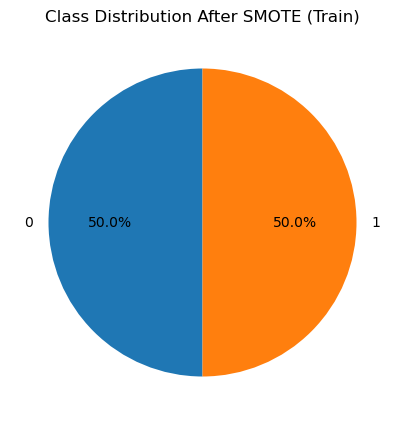

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(counts_train, labels=unique_train, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After SMOTE (Train)')
plt.show()

## now after i have cleaned the data and make it balance i will train the data using logistic regression model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')
print(f'Validation F1 Score: {val_f1}')


Validation Accuracy: 0.9452054794520548
Validation Precision: 0.9583333333333334
Validation Recall: 0.9583333333333334
Validation F1 Score: 0.9583333333333334


Test Accuracy: 0.9417040358744395
Test Precision: 0.983739837398374
Test Recall: 0.9166666666666666
Test F1 Score: 0.9490196078431372


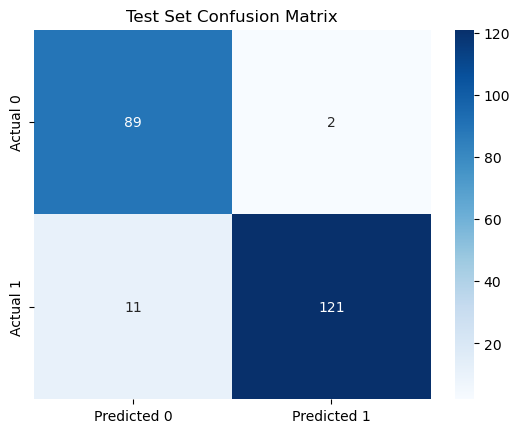

In [ ]:
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Test Set Confusion Matrix')
plt.show()

## for this experiment:
the Number of samples in the training set (after SMOTE): 606

the Number of samples in the test set: 223

the Number of samples in the validation set: 73

and i only applied SMOTE for train set only


I balanced the training set using SMOTE to ensure that the model is trained equally on both classes and doesn't become biased towards the majority class. However, I kept the test and validation sets imbalanced to reflect the real-world distribution of data. This approach helps to accurately evaluate the model's performance in a realistic scenario, where class distributions are often imbalanced. By doing this, we can better assess how well the model generalizes and performs in real-world conditions.

In [ ]:
print(f"Number of samples in the training set (after SMOTE): {X_train_smote.shape[0]}")
print(f"Number of samples in the test set: {X_test.shape[0]}")
print(f"Number of samples in the validation set: {X_val.shape[0]}")

Number of samples in the training set (after SMOTE): 606
Number of samples in the test set: 223
Number of samples in the validation set: 73


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install imbalanced-learn pandas numpy

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data = pd.read_csv("bridge_data_task1.csv")
data.rename(columns={'Unnamed: 4': 'Expert_Human_Tutor'}, inplace=True)

data_cleaned = data[['Expert_Human_Tutor', 'Label', 'Split', 'ID']].drop_duplicates(subset='ID', keep='first')

data_cleaned['Expert_Human_Tutor'] = data_cleaned['Expert_Human_Tutor'].apply(preprocess_text)

train_data = data_cleaned[data_cleaned['Split'] == 'train'][['Expert_Human_Tutor', 'Label']]
test_data = data_cleaned[data_cleaned['Split'] == 'test'][['Expert_Human_Tutor', 'Label']]
val_data = data_cleaned[data_cleaned['Split'] == 'val'][['Expert_Human_Tutor', 'Label']]

print("Before SMOTE (Train):")
print(train_data['Label'].value_counts())
print("\nBefore SMOTE (Test):")
print(test_data['Label'].value_counts())
print("\nBefore SMOTE (Validation):")
print(val_data['Label'].value_counts())

tfidf = TfidfVectorizer(max_features=1000)
X_train = tfidf.fit_transform(train_data['Expert_Human_Tutor'])
y_train = train_data['Label']

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

train_data_balanced = pd.DataFrame({
    'Expert_Human_Tutor': tfidf.inverse_transform(X_train_smote),
    'Label': y_train_smote
})
train_data_balanced['Expert_Human_Tutor'] = train_data_balanced['Expert_Human_Tutor'].apply(lambda x: ' '.join(x))

print("\nAfter SMOTE (Train):")
unique_train, counts_train = np.unique(y_train_smote, return_counts=True)
print(dict(zip(unique_train, counts_train)))

print("\nTest set distribution (untouched):")
print(test_data['Label'].value_counts())
print("\nValidation set distribution (untouched):")
print(val_data['Label'].value_counts())

print("\nBalanced Training Data (First 5 Rows):")
print(train_data_balanced.head())

print("\nValidation Data (First 5 Rows):")
print(val_data.head())

print("\nTest Data (First 5 Rows):")
print(test_data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Before SMOTE (Train):
Label
0    303
1    279
Name: count, dtype: int64

Before SMOTE (Test):
Label
1    132
0     91
Name: count, dtype: int64

Before SMOTE (Validation):
Label
1    48
0    25
Name: count, dtype: int64

After SMOTE (Train):
{0: 303, 1: 303}

Test set distribution (untouched):
Label
1    132
0     91
Name: count, dtype: int64

Validation set distribution (untouched):
Label
1    48
0    25
Name: count, dtype: int64

Balanced Training Data (First 5 Rows):
                                  Expert_Human_Tutor  Label
0                           think live death thought      0
1      maybe little early even thinking school enjoy      0
2                                     brilliant love      0
3  great try plot point need make sure move horiz...      1
4  hm quite order shape quadrilateral must side c...      1

Validation Data (First 5 Rows):
                                   Expert_Human_Tutor  Label
3                   lol whats klutz yeah like im good      0
17        

# BERT BASE

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/606 [00:00<?, ? examples/s]

Map:   0%|          | 0/73 [00:00<?, ? examples/s]

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-5-b56097817ad4>:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.275800,0.072847,0.986301,0.979592,1.000000,0.989691
2,0.083100,0.049884,0.986301,0.979592,1.000000,0.989691
3,0.075100,0.053785,0.986301,0.979592,1.000000,0.989691
4,0.048200,0.071843,0.972603,1.000000,0.958333,0.978723
5,0.001900,0.058181,0.972603,1.000000,0.958333,0.978723


Validation Results: {'eval_loss': 0.072847381234169, 'eval_accuracy': 0.9863013698630136, 'eval_precision': 0.9795918367346939, 'eval_recall': 1.0, 'eval_f1': 0.9896907216494846, 'eval_runtime': 0.2248, 'eval_samples_per_second': 324.674, 'eval_steps_per_second': 22.238, 'epoch': 5.0}
Test Results: {'eval_loss': 0.12319374829530716, 'eval_accuracy': 0.968609865470852, 'eval_precision': 0.9770992366412213, 'eval_recall': 0.9696969696969697, 'eval_f1': 0.973384030418251, 'eval_runtime': 0.3421, 'eval_samples_per_second': 651.947, 'eval_steps_per_second': 40.929, 'epoch': 5.0}


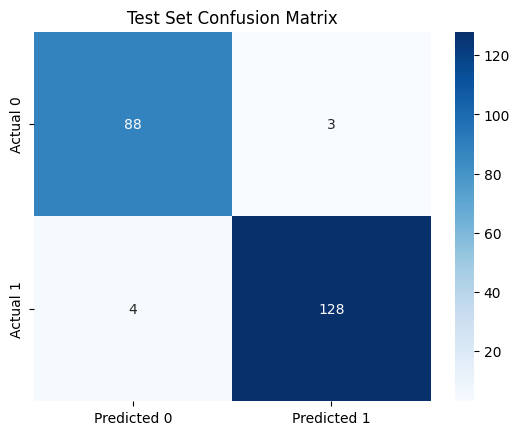

In [ ]:
!pip install transformers datasets

import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

train_dataset = Dataset.from_pandas(train_data_balanced.rename(columns={'Expert_Human_Tutor': 'text', 'Label': 'labels'}))
val_dataset = Dataset.from_pandas(val_data.rename(columns={'Expert_Human_Tutor': 'text', 'Label': 'labels'}))
test_dataset = Dataset.from_pandas(test_data.rename(columns={'Expert_Human_Tutor': 'text', 'Label': 'labels'}))

def tokenize_function(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.remove_columns(['text'])
val_dataset = val_dataset.remove_columns(['text'])
test_dataset = test_dataset.remove_columns(['text'])

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

val_results = trainer.evaluate(val_dataset)
print("Validation Results:", val_results)

test_results = trainer.evaluate(test_dataset)
print("Test Results:", test_results)

predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=1)

conf_matrix = confusion_matrix(test_data['Label'], preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Test Set Confusion Matrix')
plt.show()


# DistilBERT

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/606 [00:00<?, ? examples/s]

Map:   0%|          | 0/73 [00:00<?, ? examples/s]

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-6-c1de175de07c>:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.189400,0.187224,0.958904,1.000000,0.937500,0.967742
2,0.057700,0.106414,0.958904,0.978723,0.958333,0.968421
3,0.010900,0.139172,0.972603,0.979167,0.979167,0.979167
4,0.046400,0.177190,0.972603,1.000000,0.958333,0.978723
5,0.010700,0.180245,0.958904,0.978723,0.958333,0.968421


Validation Results: {'eval_loss': 0.13917170464992523, 'eval_accuracy': 0.9726027397260274, 'eval_precision': 0.9791666666666666, 'eval_recall': 0.9791666666666666, 'eval_f1': 0.9791666666666666, 'eval_runtime': 0.1229, 'eval_samples_per_second': 593.923, 'eval_steps_per_second': 40.68, 'epoch': 5.0}
Test Results: {'eval_loss': 0.12135056406259537, 'eval_accuracy': 0.968609865470852, 'eval_precision': 0.9770992366412213, 'eval_recall': 0.9696969696969697, 'eval_f1': 0.973384030418251, 'eval_runtime': 0.2381, 'eval_samples_per_second': 936.467, 'eval_steps_per_second': 58.792, 'epoch': 5.0}


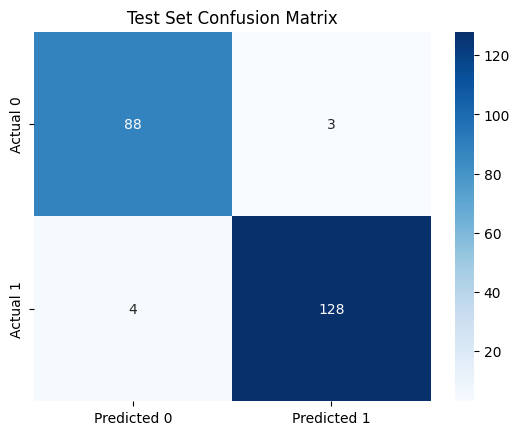

In [ ]:
!pip install transformers datasets

import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

train_dataset = Dataset.from_pandas(train_data_balanced.rename(columns={'Expert_Human_Tutor': 'text', 'Label': 'labels'}))
val_dataset = Dataset.from_pandas(val_data.rename(columns={'Expert_Human_Tutor': 'text', 'Label': 'labels'}))
test_dataset = Dataset.from_pandas(test_data.rename(columns={'Expert_Human_Tutor': 'text', 'Label': 'labels'}))
def tokenize_function(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.remove_columns(['text'])
val_dataset = val_dataset.remove_columns(['text'])
test_dataset = test_dataset.remove_columns(['text'])

training_args = TrainingArguments(
    output_dir="./distilbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./distilbert_logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()
val_results = trainer.evaluate(val_dataset)
print("Validation Results:", val_results)

test_results = trainer.evaluate(test_dataset)
print("Test Results:", test_results)

predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=1)

conf_matrix = confusion_matrix(test_data['Label'], preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Test Set Confusion Matrix')
plt.show()


Training Naive Bayes...
Test Precision: 0.98
Test Recall: 0.98
Test F1 Score: 0.98
Test Accuracy: 0.97



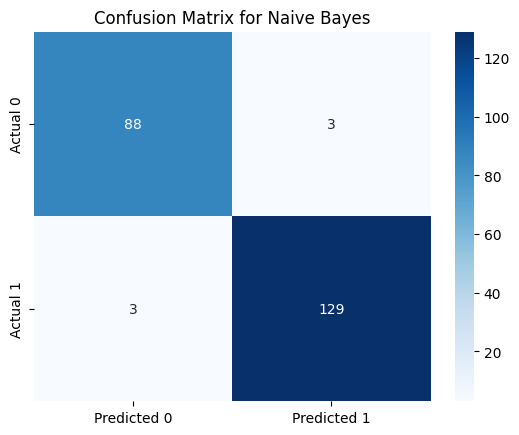

Training MLP...
Test Precision: 0.98
Test Recall: 0.95
Test F1 Score: 0.97
Test Accuracy: 0.96



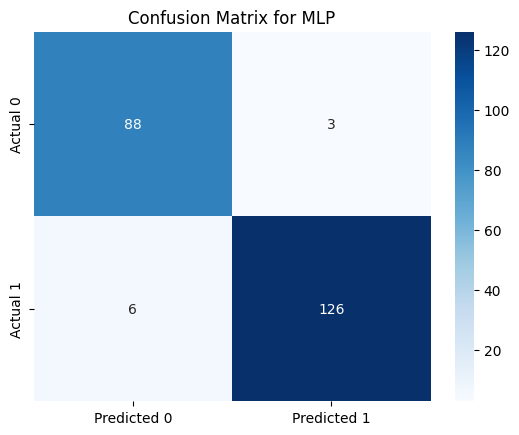

Training SVM...
Test Precision: 0.98
Test Recall: 0.97
Test F1 Score: 0.97
Test Accuracy: 0.97



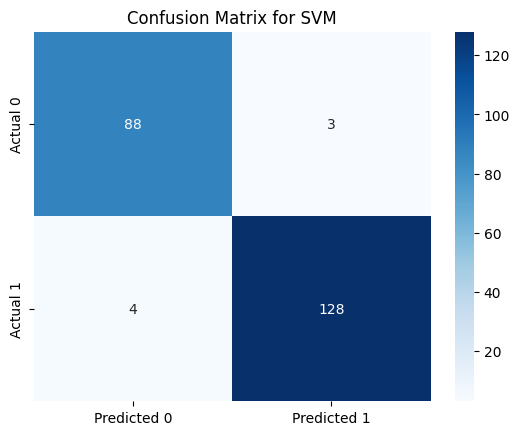

Training Logistic Regression...
Test Precision: 0.98
Test Recall: 0.92
Test F1 Score: 0.95
Test Accuracy: 0.95



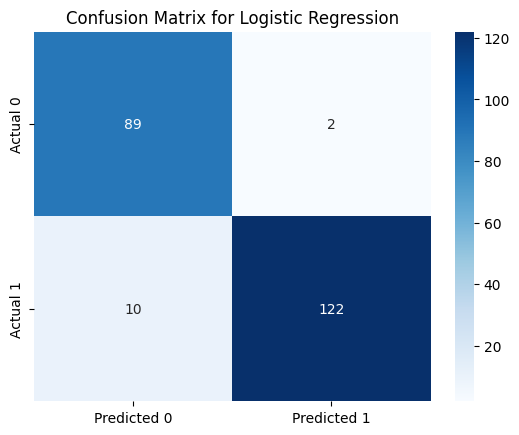

Training LDA...
Test Precision: 0.82
Test Recall: 0.77
Test F1 Score: 0.79
Test Accuracy: 0.76



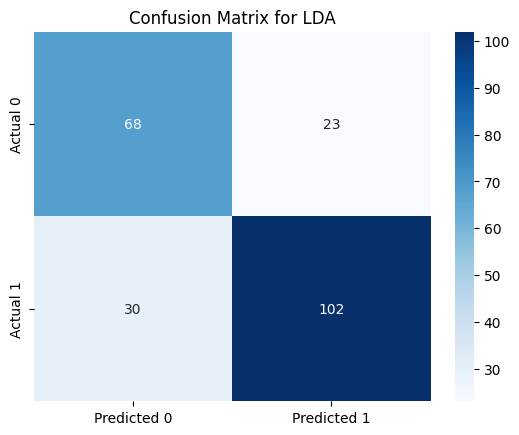

Training KNN...
Test Precision: 1.00
Test Recall: 0.13
Test F1 Score: 0.23
Test Accuracy: 0.48



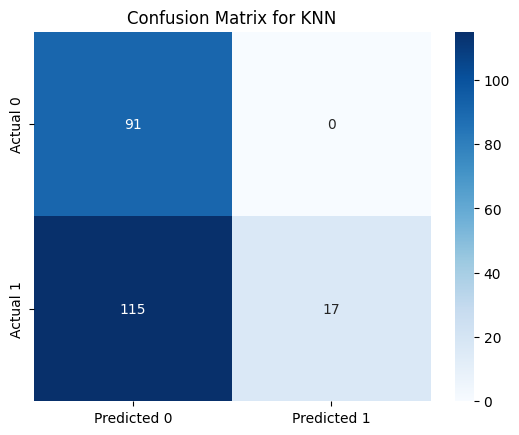

Training Decision Tree...
Test Precision: 0.96
Test Recall: 0.82
Test F1 Score: 0.88
Test Accuracy: 0.87



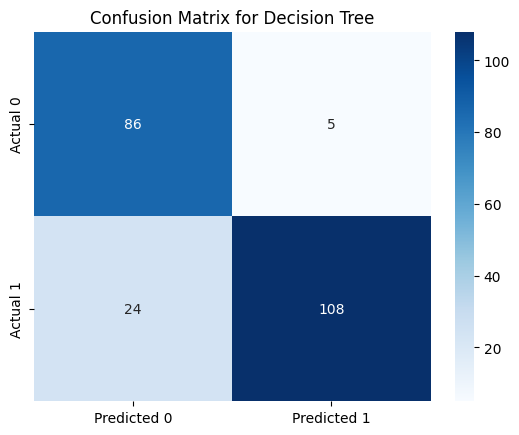

Training Random Forest...
Test Precision: 0.95
Test Recall: 0.91
Test F1 Score: 0.93
Test Accuracy: 0.92



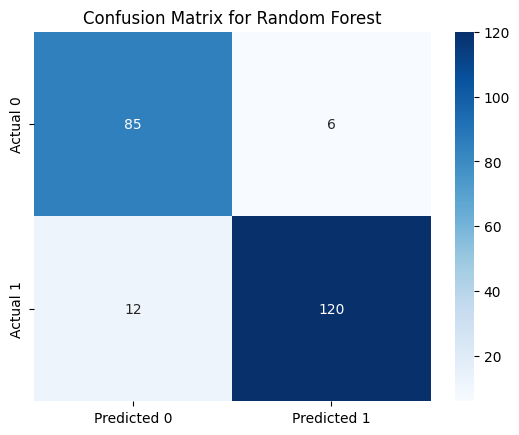

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Precision: 0.94
Test Recall: 0.80
Test F1 Score: 0.86
Test Accuracy: 0.85



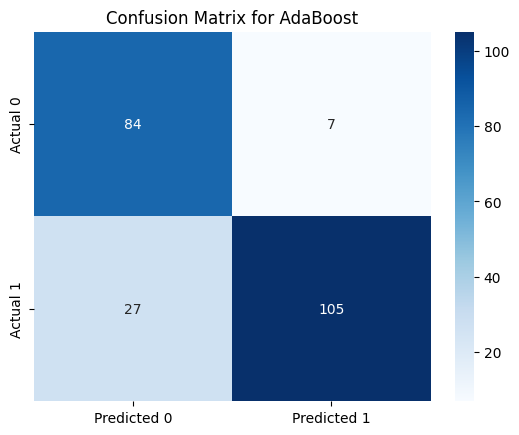

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:51:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Precision: 0.90
Test Recall: 0.83
Test F1 Score: 0.87
Test Accuracy: 0.85



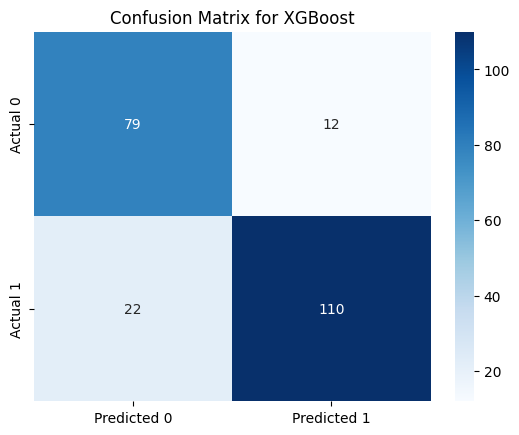

Training LightGBM...
[LightGBM] [Info] Number of positive: 303, number of negative: 303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

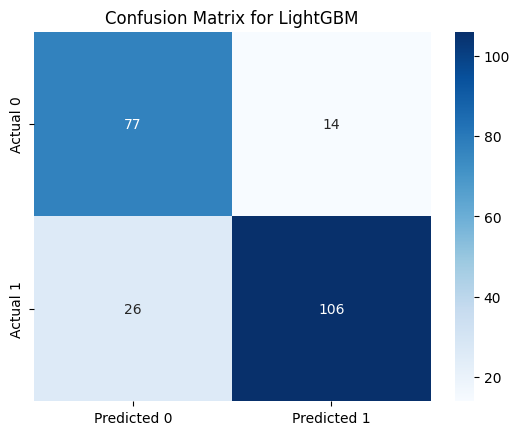

Model Performance:
                  Model   Precision     Recall   F1-Score
0           Naive Bayes   97.727273  97.727273  97.727273
2                   SVM   97.709924  96.969697  97.338403
1                   MLP   97.674419  95.454545  96.551724
3   Logistic Regression   98.387097  92.424242  95.312500
7         Random Forest   95.238095  90.909091  93.023256
6         Decision Tree   95.575221  81.818182  88.163265
9               XGBoost   90.163934  83.333333  86.614173
8              AdaBoost   93.750000  79.545455  86.065574
10             LightGBM   88.333333  80.303030  84.126984
4                   LDA   81.600000  77.272727  79.377432
5                   KNN  100.000000  12.878788  22.818792


<ipython-input-9-ff08e8bddd09>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="F1-Score", y="Model", palette="viridis")


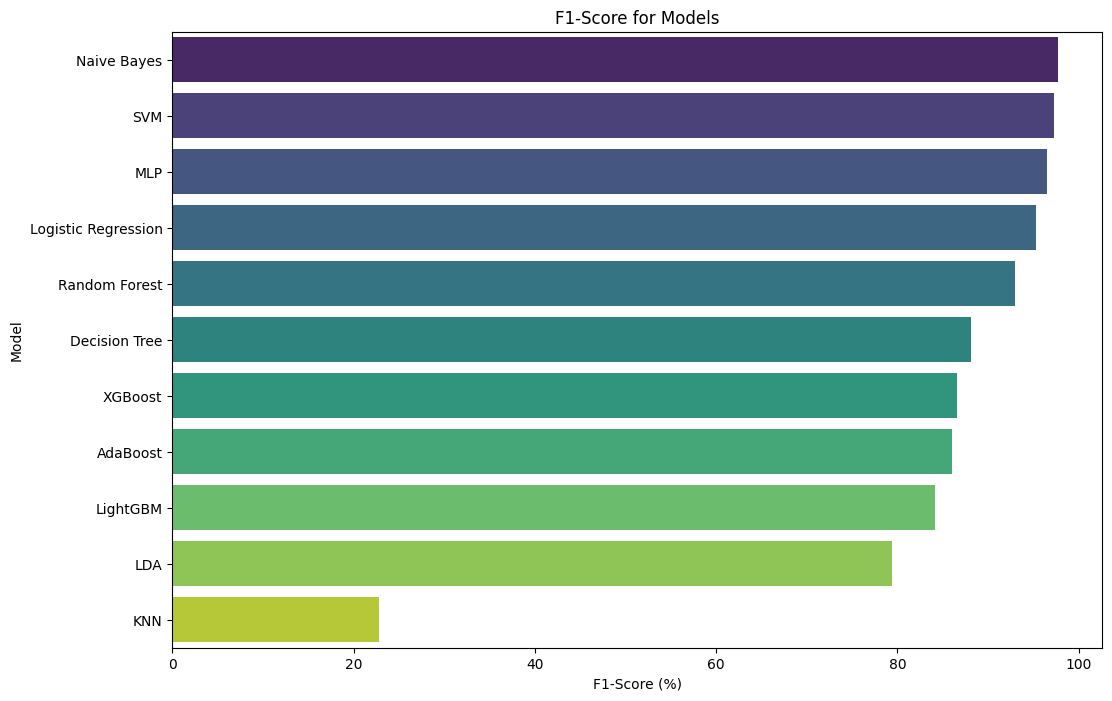

In [ ]:
!pip install scikit-learn xgboost lightgbm

from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tfidf = TfidfVectorizer(max_features=1000)
X_train_sparse = tfidf.fit_transform(train_data_balanced['Expert_Human_Tutor'])
y_train = train_data_balanced['Label']
X_val_sparse = tfidf.transform(val_data['Expert_Human_Tutor'])
y_val = val_data['Label']
X_test_sparse = tfidf.transform(test_data['Expert_Human_Tutor'])
y_test = test_data['Label']

X_train = X_train_sparse.toarray()
X_val = X_val_sparse.toarray()
X_test = X_test_sparse.toarray()

def train_evaluate_model(model, model_name):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    test_f1 = f1_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Test Precision: {test_precision:.2f}")
    print(f"Test Recall: {test_recall:.2f}")
    print(f"Test F1 Score: {test_f1:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}\n")

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    return {
        "Model": model_name,
        "Precision": test_precision * 100,
        "Recall": test_recall * 100,
        "F1-Score": test_f1 * 100
    }

models = {
    "Naive Bayes": MultinomialNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LDA": LDA(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
}

results = []
for model_name, model in models.items():
    result = train_evaluate_model(model, model_name)
    results.append(result)

results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("Model Performance:")
print(results_df)

plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x="F1-Score", y="Model", palette="viridis")
plt.title("F1-Score for Models")
plt.xlabel("F1-Score (%)")
plt.ylabel("Model")
plt.show()


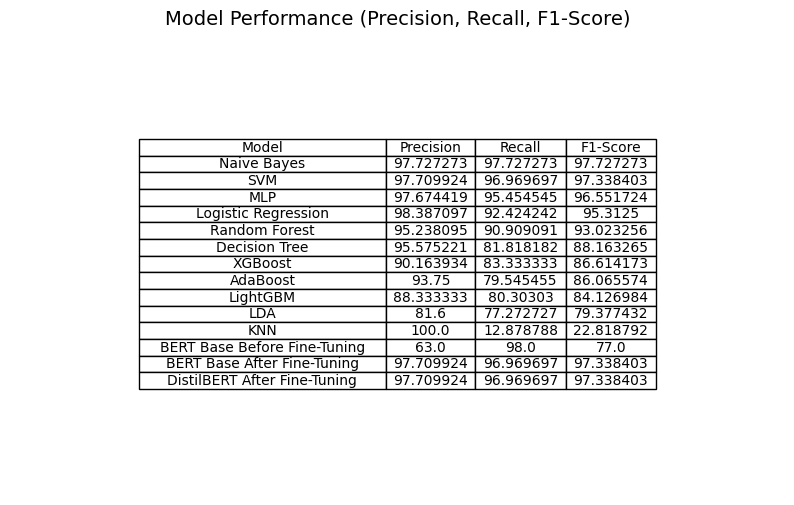

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Model": [
        "Naive Bayes", "SVM", "MLP", "Logistic Regression", "Random Forest",
        "Decision Tree", "XGBoost", "AdaBoost", "LightGBM", "LDA", "KNN",
        "BERT Base Before Fine-Tuning", "BERT Base After Fine-Tuning", "DistilBERT After Fine-Tuning"
    ],
    "Precision": [
        97.727273, 97.709924, 97.674419, 98.387097, 95.238095,
        95.575221, 90.163934, 93.75, 88.333333, 81.6, 100,
        63.0, 97.709924, 97.709924
    ],
    "Recall": [
        97.727273, 96.969697, 95.454545, 92.424242, 90.909091,
        81.818182, 83.333333, 79.545455, 80.30303, 77.272727, 12.878788,
        98.0, 96.969697, 96.969697
    ],
    "F1-Score": [
        97.727273, 97.338403, 96.551724, 95.3125, 93.023256,
        88.163265, 86.614173, 86.065574, 84.126984, 79.377432, 22.818792,
        77.0, 97.338403, 97.338403
    ]
}

results_df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

plt.title("Model Performance (Precision, Recall, F1-Score)", fontsize=14)
plt.show()


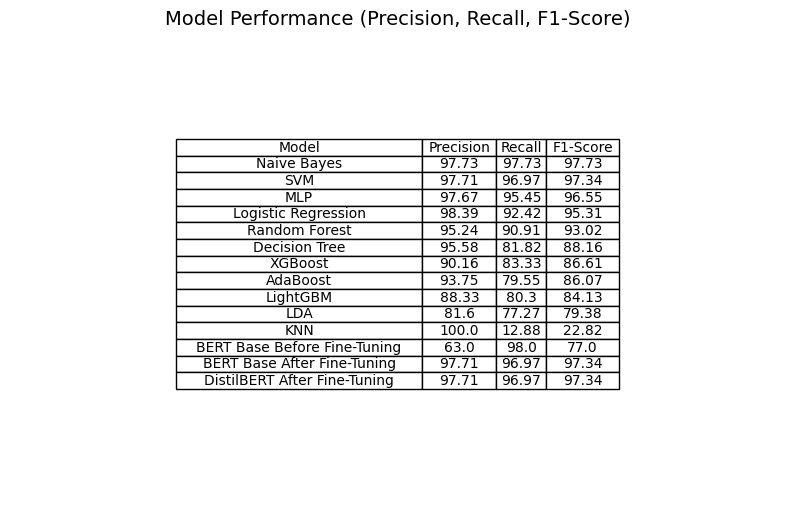

In [ ]:
results_df = results_df.round({"Precision": 2, "Recall": 2, "F1-Score": 2})

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

plt.title("Model Performance (Precision, Recall, F1-Score)", fontsize=14)
plt.show()


<ipython-input-19-c5d7d2facc7c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=results_df, x="F1-Score", y="Model", palette="viridis")


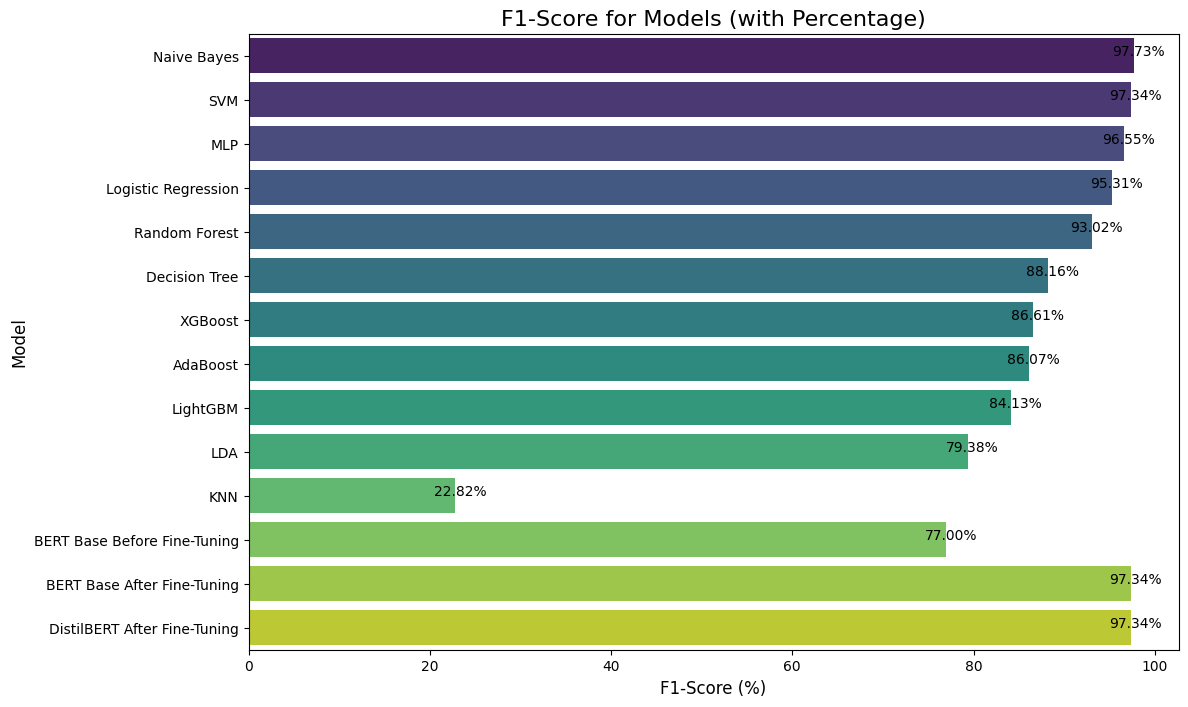

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=results_df, x="F1-Score", y="Model", palette="viridis")

for index, row in results_df.iterrows():
    barplot.text(row["F1-Score"] + 0.5, index, f"{row['F1-Score']:.2f}%", color="black", ha="center")

plt.title("F1-Score for Models (with Percentage)", fontsize=16)
plt.xlabel("F1-Score (%)", fontsize=12)
plt.ylabel("Model", fontsize=12)

plt.show()


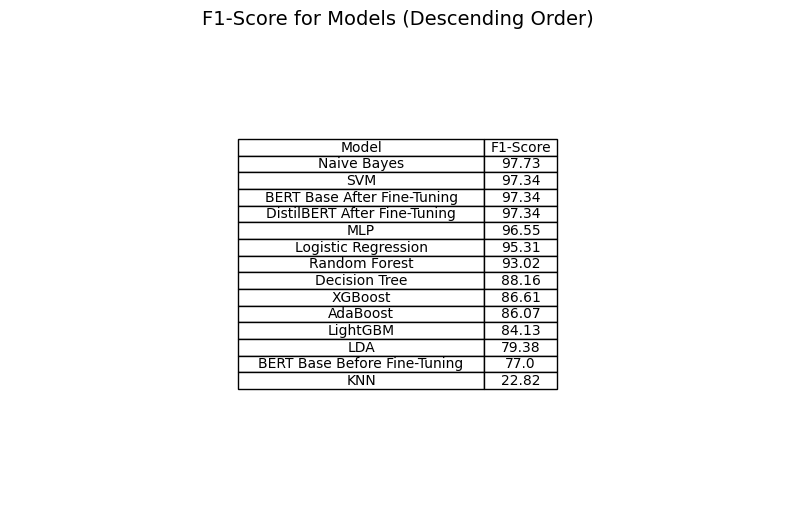

In [ ]:
f1_scores_df = results_df.sort_values(by="F1-Score", ascending=False)[["Model", "F1-Score"]]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=f1_scores_df.values, colLabels=f1_scores_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(f1_scores_df.columns))))

plt.title("F1-Score for Models (Descending Order)", fontsize=14)
plt.show()


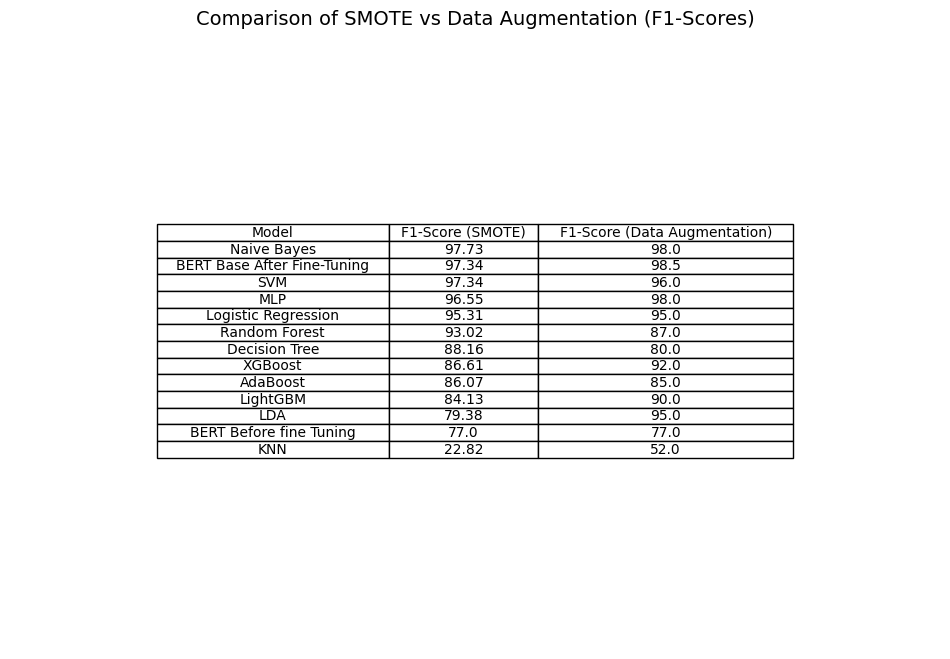

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

smote_data = {
    "Model": [
        "Naive Bayes", "SVM", "MLP", "Logistic Regression", "Random Forest",
        "Decision Tree", "XGBoost", "AdaBoost", "LightGBM", "LDA", "KNN",
        "BERT Before fine Tuning", "BERT Base After Fine-Tuning"
    ],
    "F1-Score (SMOTE)": [
        97.73, 97.34, 96.55, 95.31, 93.02, 88.16, 86.61, 86.07, 84.13, 79.38, 22.82, 77.0, 97.34
    ]
}

augmentation_data = {
    "Model": [
        "BERT Base After Fine-Tuning", "Naive Bayes", "MLP", "SVM", "Logistic Regression",
        "LDA", "XGBoost", "LightGBM", "Random Forest", "AdaBoost", "Decision Tree",
        "BERT Before fine Tuning", "KNN"
    ],
    "F1-Score (Data Augmentation)": [
        98.5, 98.0, 98.0, 96.0, 95.0, 95.0, 92.0, 90.0, 87.0, 85.0, 80.0, 77.0, 52.0
    ]
}

smote_df = pd.DataFrame(smote_data)
augmentation_df = pd.DataFrame(augmentation_data)

comparison_df = pd.merge(
    smote_df, augmentation_df, on="Model", how="outer"
).sort_values(by="F1-Score (SMOTE)", ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=comparison_df.values, colLabels=comparison_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(comparison_df.columns))))

plt.title("Comparison of SMOTE vs Data Augmentation (F1-Scores)", fontsize=14)
plt.show()

